## Python-Bibliotheken

In [24]:
# Datenquelle & Visualisierung
import seaborn as sns

# Datenaufbereitung
from sklearn.model_selection import train_test_split

# Dimensionsreduktion
from sklearn.decomposition import PCA

# Klassifikation
from sklearn.naive_bayes import GaussianNB

# Modellbeurteilung
from sklearn.metrics import accuracy_score

## Daten einlesen

In [25]:
iris = sns.load_dataset("iris")

Iris-Datensammlung mit Seaborn-Bibliothek herunterladen \
Informationen zur Datensammlung: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [26]:
iris.shape

(150, 5)

Dimensionen der Daten:\
150 Zeilen (Blumen) x 5 Spalten (Merkmale)

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Zusammensetzung der Spalten:\
4 Spalten für Merkmale der Blumen, 1 Spalte für Blumentyp

In [28]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Ausprägungen des Merkmals "species":\
Insgesamt 3 verschiedene erfasste Blumentypen. \
Nämlich "Setosa", "Versicolor" und "Virginica".

# Dimensionsreduktion
Merkmale sollen von vier auf zwei Dimensionen reduziert werden.

## Daten formatieren

### Merkmalsmatrix

In [29]:
X = iris.drop("species", axis = "columns")
X.shape

(150, 4)

## Modell auswählen

In [30]:
model = PCA(n_components = 2)

## Modell auf Daten anwenden

### Modell trainieren

In [31]:
model.fit(X)

PCA(n_components=2)

### Modell testen

In [32]:
X_2D = model.transform(X)
X_2D.shape

(150, 2)

In [33]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


Schätzergebnisse der PCA in Ausgangsdaten gespeichert.

### Modell beurteilen

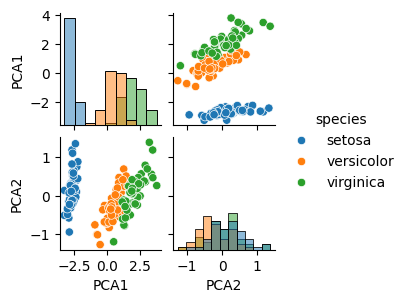

In [34]:
sns.pairplot(iris, # dataframe
             hue = "species", # name of discriminating variable
             vars = ["PCA1", "PCA2"], # variables to use
             diag_kind = "hist", # histogram for diagonal subplots
             height = 1.5)

Paarweise Beziehung zwischen PCA-Merkmalen zeigt:
- Klare Abgrenzung der Spezies trotz Reduktion der Merkmalsdimensionen.
- Komplexität ohne wesentlichen Informationsverlust reduziert.

# Klassifikation
Vorhersage der Spezies auf Grundlage eines Modells, das mit einem Teil der Iris-Daten trainiert wurde.\
Anschließender Vergleich der vorhergesagten Spezies mit der tatsächlichen Spezies.

## Daten formatieren

### Zielvektor (abhängige Variable)

In [35]:
y = iris["species"]
y.shape

(150,)

### Trainings- und Testdaten

In [36]:
Xtrain_V1, Xtest_V1, ytrain_V1, ytest_V1 = train_test_split(X, y, random_state = 1) # 4 Merkmalsdimensionen
Xtrain_V2, Xtest_V2, ytrain_V2, ytest_V2 = train_test_split(X_2D, y, random_state = 1) # 2 Merkmalsdimensionen

## Modell auswählen

In [37]:
model_V1 = GaussianNB() # 4 Merkmalsdimensionen
model_V2 = GaussianNB() # 2 Merkmalsdimensionen

## Modell auf Daten anwenden

### Modell trainieren

In [38]:
model_V1.fit(Xtrain_V1, ytrain_V1) # 4 Merkmalsdimensionen
model_V2.fit(Xtrain_V2, ytrain_V2) # 2 Merkmalsdimensionen

GaussianNB()

### Modell testen

In [39]:
y_model_V1 = model_V1.predict(Xtest_V1) # 4 Merkmalsdimensionen
y_model_V2 = model_V2.predict(Xtest_V2) # 2 Merkmalsdimensionen

### Modell beurteilen

In [40]:
accuracy_score(ytest_V1, y_model_V1)

0.9736842105263158

Etwa 97% der Blumen wurden auf Grundlage der VIER Merkmalsdimensionen der korrekten Spezies zugeordnet.

In [41]:
accuracy_score(ytest_V2, y_model_V2)

0.9473684210526315

Etwa 94% der Blumen wurden auf Grundlage der ZWEI Merkmalsdimensionen der korrekten Spezies zugeordnet.\
Die Dimensionsreduktion bei den Merkmalen hat somit zu einer Verschlechterung der Vorhersagekraft des Modells geführt.